In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# data_url = "https://github.com/mmonj/CSCI-381-Applied-Data-Science/raw/refs/heads/main/quiz4/data/HDMA%20Boston%20Housing%20Data.csv"
data_url = "quiz4/data/HDMA Boston Housing Data.csv"

df = pd.read_csv(data_url, index_col=0)

df.head()


,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


## Exploratory Data Analysis (EDA)

We'll check out the data and see what we're working with. We'll look at the columns, summary stats, and check for missing values.

In [522]:
# view columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2381
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 260.4+ KB


In [523]:
# view missing values
df.isna().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [524]:
# view data summary
df.describe(include="all")

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2380,2381,2380,2381,2381.000000,2381.000000,2381,2381
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,no,no,no,no,NaN,NaN,no,no
freq,NaN,NaN,NaN,NaN,NaN,2205,2333,2103,1444,NaN,NaN,2042,2096
mean,0.330814,0.255346,0.737760,2.116387,1.721008,NaN,NaN,NaN,NaN,3.774496,0.288114,NaN,NaN
std,0.107235,0.096635,0.178715,1.666370,0.537169,NaN,NaN,NaN,NaN,2.026636,0.452980,NaN,NaN
min,0.000000,0.000000,0.020000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.800000,0.000000,NaN,NaN
25%,0.280000,0.214000,0.652850,1.000000,1.000000,NaN,NaN,NaN,NaN,3.100000,0.000000,NaN,NaN
50%,0.330000,0.260000,0.779412,1.000000,2.000000,NaN,NaN,NaN,NaN,3.200000,0.000000,NaN,NaN
75%,0.370000,0.298800,0.868421,2.000000,2.000000,NaN,NaN,NaN,NaN,3.900000,1.000000,NaN,NaN


## Data Columns

- `dir`: debt payments to total income ratio
- `hir`: housing expenses to income ratio
- `lvr`: ratio of loan size to property value
- `ccs`: consumer credit score (1-6, lower is better)
- `mcs`: mortgage credit score (1-4, lower is better)
- `pbcr`: public bad credit record (yes/no)
- `dmi`: denied mortgage insurance (yes/no)
- `self`: self employed (yes/no)
- `single`: is the applicant single (yes/no)
- `uria`: unemployment rate in applicant's industry
- `comdominiom`: is unit a condominium (0/1)
- `black`: is the applicant black (yes/no)
- `deny`: mortgage application denied (yes/no)

Some columns are categorical (yes/no), some are numeric. We'll need to handle these when modeling

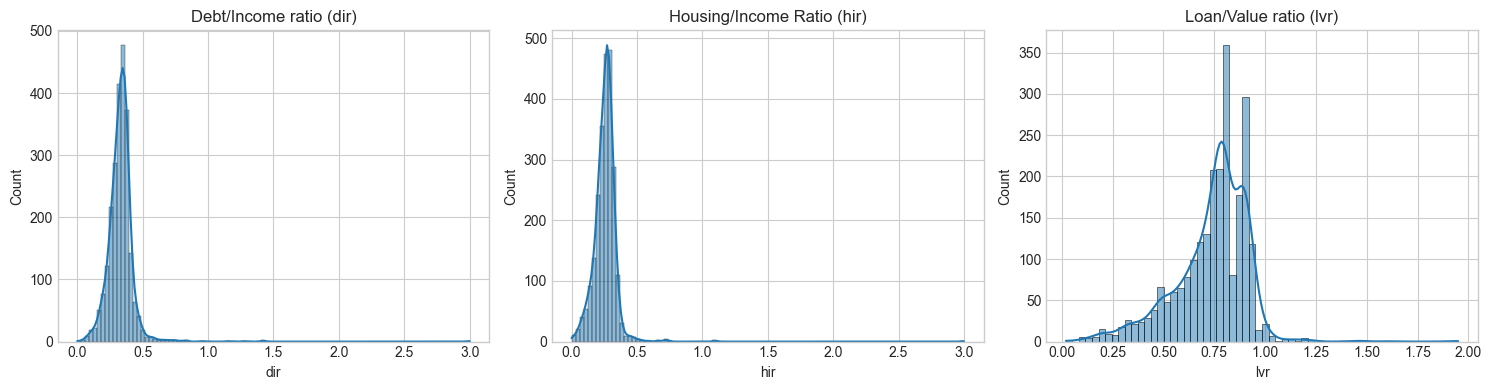

In [525]:
# look at a few distributions for some numeric columns

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df["dir"], ax=axs[0], kde=True)
axs[0].set_title("Debt/Income ratio (dir)")

sns.histplot(df["hir"], ax=axs[1], kde=True)
axs[1].set_title("Housing/Income Ratio (hir)")

sns.histplot(df["lvr"], ax=axs[2], kde=True)
axs[2].set_title("Loan/Value ratio (lvr)")

plt.tight_layout()
plt.show()

## Categorical Columns

We'll look at the value counts for some of the yes/no columns to see if the data is balanced or not

In [526]:
# check value counts for some categorical columns
for col in ["pbcr", "dmi", "self", "single", "black", "deny"]:
    print(f"{col} value counts:")
    print(df[col].value_counts())
    print()

# check the condo column (should be 0/1)
print("comdominiom value counts:")
print(df["comdominiom"].value_counts())

pbcr value counts:
pbcr
no     2205
yes     175
Name: count, dtype: int64

dmi value counts:
dmi
no     2333
yes      48
Name: count, dtype: int64

self value counts:
self
no     2103
yes     277
Name: count, dtype: int64

single value counts:
single
no     1444
yes     937
Name: count, dtype: int64

black value counts:
black
no     2042
yes     339
Name: count, dtype: int64

deny value counts:
deny
no     2096
yes     285
Name: count, dtype: int64

comdominiom value counts:
comdominiom
0    1695
1     686
Name: count, dtype: int64


## Data Preparation

This is where we clean up the data. We'll handle missing values, convert yes/no columns to 0/1, and make sure all columns are in the right format for modeling

In [527]:
# fill missing values in pbcr and self with a mode imputer
df["pbcr"] = df["pbcr"].fillna(df["pbcr"].mode()[0])
df["self"] = df["self"].fillna(df["self"].mode()[0])

# convert yes/no columns to 0/1 for modeling
for col in ["pbcr", "dmi", "self", "single", "black", "deny"]:
    df[col] = df[col].map({"no": 0, "yes": 1})

# make sure comdominiom is an int type (of values either 0 or 1)
df["comdominiom"] = df["comdominiom"].astype(int)

df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
2,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
3,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
4,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
5,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0


In [528]:
# check again for missing values after cleaning
df.isna().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

## Prepped Data Review

Now that we've cleaned up the data, we'll double check that everything looks good before we start modeling. We'll check for missing values, look at summary stats, and plot a few distributions to make sure the data is ready use

In [529]:
# check for missing values after cleaning
df.isna().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [530]:
# summarize statistics after cleaning
df.describe(include="all")

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,0.073499,0.020160,0.116338,0.393532,3.774496,0.288114,0.142377,0.119698
std,0.107235,0.096635,0.178715,1.666370,0.537169,0.261008,0.140576,0.320697,0.488636,2.026636,0.452980,0.349510,0.324676
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


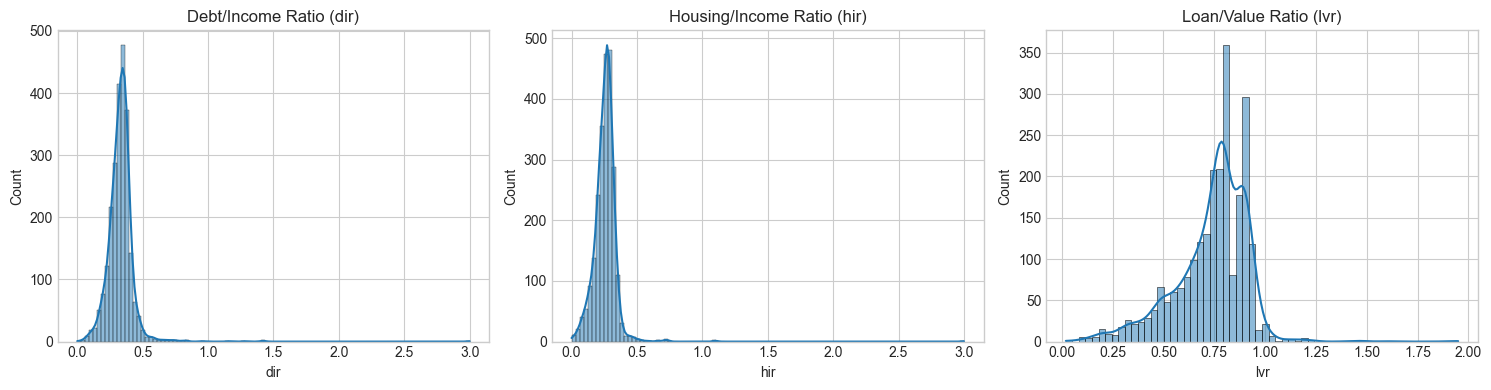

In [531]:
# plot distributions for a few key variables after cleaning
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df["dir"], ax=axs[0], kde=True)
axs[0].set_title("Debt/Income Ratio (dir)")

sns.histplot(df["hir"], ax=axs[1], kde=True)
axs[1].set_title("Housing/Income Ratio (hir)")

sns.histplot(df["lvr"], ax=axs[2], kde=True)
axs[2].set_title("Loan/Value Ratio (lvr)")

plt.tight_layout()
plt.show()

## Feature Engineering and Selection

Now that the data is clean, we can take a look at which features to use for logistic regression models. We'll try a few different combinations, including all features and some with only the most important ones.

deny           1.000000
dmi            0.352165
pbcr           0.272961
ccs            0.262361
black          0.205211
dir            0.199337
lvr            0.162249
hir            0.133072
mcs            0.109646
single         0.076389
self           0.051829
uria           0.043593
comdominiom    0.039675
Name: deny, dtype: float64


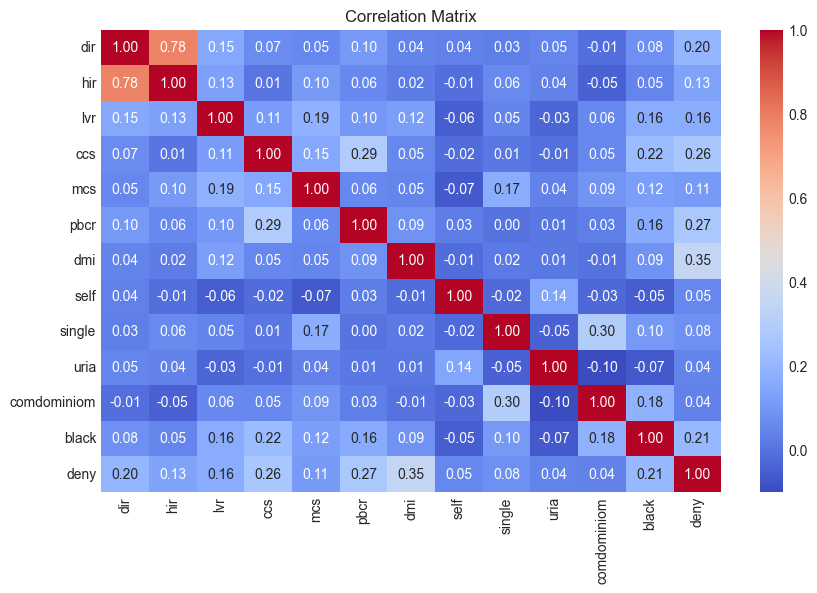

In [532]:
# look at correlation with the target DENY variable
corrs = df.corr(numeric_only=True)["deny"].sort_values(ascending=False)
print(corrs)

# heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Modeling: Logistic Regression

We'll split the data into train and test sets, then try out a few logistic regression models with different feature sets. We'll compare their performance and pick the best one.

In [533]:
# split data into X and y
y = df["deny"]
# drop the target and any columns that are not features
X = df.drop(columns=["deny"])

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1666, 12), Test shape: (715, 12)


In [534]:
# model 1: all features
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("Model 1 (all features) Accuracy:", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print("ROC AUC:", roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1]))

# cross validation
cv_scores1 = cross_val_score(model1, X_train, y_train, cv=5, scoring="accuracy")
print("CV Accuracy (all features):", cv_scores1.mean())

Model 1 (all features) Accuracy: 0.8951048951048951
[[621   8]
 [ 67  19]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       629
           1       0.70      0.22      0.34        86

    accuracy                           0.90       715
   macro avg       0.80      0.60      0.64       715
weighted avg       0.88      0.90      0.87       715

ROC AUC: 0.8245646467260694
CV Accuracy (all features): 0.9045620470770173


In [535]:
# model 2: only features with highest correlation to deny
# Let's pick top 5 features by absolute correlation (excluding deny itself)
top_corr_features = corrs.abs().sort_values(ascending=False).index[1:6].tolist()
print("Top correlated features:", top_corr_features)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train[top_corr_features], y_train)
y_pred2 = model2.predict(X_test[top_corr_features])

print("Model 2 (Top correlated features) Accuracy:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print("ROC AUC:", roc_auc_score(y_test, model2.predict_proba(X_test[top_corr_features])[:, 1]))

cv_scores2 = cross_val_score(model2, X_train[top_corr_features], y_train, cv=5, scoring="accuracy")
print("CV Accuracy (Top correlated features):", cv_scores2.mean())

Top correlated features: ['dmi', 'pbcr', 'ccs', 'black', 'dir']
Model 2 (Top correlated features) Accuracy: 0.8951048951048951
[[622   7]
 [ 68  18]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       629
           1       0.72      0.21      0.32        86

    accuracy                           0.90       715
   macro avg       0.81      0.60      0.63       715
weighted avg       0.88      0.90      0.87       715

ROC AUC: 0.8301105483048028
CV Accuracy (Top correlated features): 0.9057614500728273


In [536]:
# model 3: only numeric features (no categorical/binary)
numeric_cols = [col for col in X.columns if X[col].dtype in [np.float64, np.int64] and col != "deny"]
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train[numeric_cols], y_train)
y_pred3 = model3.predict(X_test[numeric_cols])

print("Model 3 (Numeric features only) Accuracy:", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print("ROC AUC:", roc_auc_score(y_test, model3.predict_proba(X_test[numeric_cols])[:, 1]))

cv_scores3 = cross_val_score(model3, X_train[numeric_cols], y_train, cv=5, scoring="accuracy")
print("CV Accuracy (Numeric features):", cv_scores3.mean())

Model 3 (Numeric features only) Accuracy:

 0.8951048951048951
[[621   8]
 [ 67  19]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       629
           1       0.70      0.22      0.34        86

    accuracy                           0.90       715
   macro avg       0.80      0.60      0.64       715
weighted avg       0.88      0.90      0.87       715

ROC AUC: 0.8245646467260694
CV Accuracy (Numeric features): 0.9045620470770173


## Model Comparison and Selection

Now we can compare the three models

In [537]:
print("Model 1 coefficients (all features):")
for feature, coef in zip(X_train.columns, model1.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Model 1 coefficients (all features):
dir: 2.0579
hir: 1.2278
lvr: 1.6676
ccs: 0.2868
mcs: 0.2341
pbcr: 1.0046
dmi: 3.6924
self: 0.7825
single: 0.3142
uria: 0.0740
comdominiom: -0.0403
black: 0.7158


In [538]:
print("Model 2 coefficients (top Correlated features):")
for feature, coef in zip(top_corr_features, model2.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Model 2 coefficients (top Correlated features):
dmi: 3.8224
pbcr: 1.0975
ccs: 0.2924
black: 0.7505
dir: 2.7832


In [539]:
print("Model 3 coefficients (numeric featuresoOnly):")
for feature, coef in zip(numeric_cols, model3.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Model 3 coefficients (numeric featuresoOnly):
dir: 2.0579
hir: 1.2278
lvr: 1.6676
ccs: 0.2868
mcs: 0.2341
pbcr: 1.0046
dmi: 3.6924
self: 0.7825
single: 0.3142
uria: 0.0740
comdominiom: -0.0403
black: 0.7158


## Interpretation of Coefficients

Looking at the model coefficients, some features clearly have a stronger effect on whether a loan gets denied:

- **`dmi` (Debt-to-Income Ratio)**: This has the biggest impact across all models. Higher debt compared to income makes denial more likely
- **`pbcr` (Public Bad Credit Record)**: Also has a strong positive effect. If someone has a bad credit record, they’re more likely to be denied
- **`dir`, `hir`, `lvr`**: These are all related to debt or loan size, and their positive values suggest that higher values lead to a higher chance of denial
- **`black`**: This variable also has a positive coefficient. That means applicants marked as `black` are more likely to be denied, which could be a sign of possible unfair treatment.
- **`ccs` (Credit Score)**: This has a smaller positive value. That’s a little unexpected, as we usually think higher credit scores should reduce the chance of denial
- **Other features like `uria`, `condominium`, and `single`** don’t seem to have much effect based on their small coefficients

The results make sense for the most part. Some features strongly relate to credit risk, while others may need to be reviewed more closely for fairness


## Model Selection

After looking at the results from all three models, we are choosing **Model 2 (Top Correlated Features)** as the final model:

- It only uses 5 features: `dmi`, `pbcr`, `ccs`, `black`, and `dir`, which makes it easier to understand and work with
- It has the **highest ROC AUC** (0.8301), which means it does a slightly better job separating approved and denied applications
- It also has the **best cross validation accuracy** (0.9058), showing it performs well on different parts of the data
- The features used in this model make sense. For example, having a bad credit record or a high debt-to-income ratio makes denial more likely
- The `black` variable has a positive effect on the chance of denial, which might point to unfair treatment

Overall, **Model 2 is accurate, simple, and highlights the important features**, so we are selecting it as the best model


## Conclusion

In this notebook, we explored the Boston Housing data to predict whether a mortgage loan would be denied. We did some basic analysis, prepared the data, and tested three logistic regression models.

All three models had similar accuracy, but Model 2 (which used just the top 5 most important features) had the best overall performance and was easier to understand. It also showed some important factors that affect loan denial, like debt-to-income ratio, bad credit history, and possibly race.

Model 2 was chosen as our final model because it balances good performance with simplicity.